<a href="https://colab.research.google.com/github/ManasChandan/deep-learning-series/blob/master/Deep_Learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Storing the data link

data_link = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"

In [2]:
# All the necessary imports

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seeding the Keras for same output generation
keras.utils.set_random_seed(42)

In [3]:
# Getting the data

df = pd.read_csv(data_link)
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [6]:
# Identifying the actual numerical and the categorical values

categorical_variables = ['sex', 'cp', 'fbs', 'restecg','exang', 'ca', 'thal']
numerical_vars = ['age', 'trestbps','chol', 'thalach', 'oldpeak', 'slope']

In [7]:
# One hot encoding the categorical values

df = pd.get_dummies(df, columns=categorical_variables, dtype=int)
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'target',
       'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'fbs_0',
       'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1',
       'ca_0', 'ca_1', 'ca_2', 'ca_3', 'thal_1', 'thal_2', 'thal_fixed',
       'thal_normal', 'thal_reversible'],
      dtype='object')

In [8]:
# test train split before normalizing

train_data = df.sample(frac=0.8, random_state=42)
test_data = df.drop(train_data.index)

train_data.shape, test_data.shape

((242, 30), (61, 30))

In [9]:
# Getting the mean and std for normalisation

mean_val = train_data[numerical_vars].mean()
std_val = train_data[numerical_vars].std()

In [10]:
# Normalising the Numerical input features

train_data[numerical_vars] = (train_data[numerical_vars] - mean_val) / std_val
test_data[numerical_vars] = (test_data[numerical_vars] - mean_val) / std_val

In [11]:
# Separating the X, Y for ML(X) = Y

X_train = train_data.drop('target', axis=1).to_numpy()
y_train = train_data['target'].to_numpy()

X_test = test_data.drop('target', axis=1).to_numpy()
y_test = test_data['target'].to_numpy()

In [12]:
X_train

array([[-0.66865211, -0.78982488, -1.8038203 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.00320806, -0.21772784, -0.75272288, ...,  0.        ,
         0.        ,  1.        ],
       [-0.11411541, -1.24750252, -0.58379651, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.99495801, -0.21772784,  0.33591373, ...,  0.        ,
         0.        ,  1.        ],
       [-0.33593009,  2.29949914, -0.86534046, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.55132865, -0.38935695,  0.24206575, ...,  0.        ,
         0.        ,  1.        ]])

In [13]:
# Creating the Neural Network

# Simple Network - Input + Dense(16)(relu) + Dense(8)(relu) + Output(Sigmoid)
# Loss = binary_cross_entropy, optimizer = SGD with Adam

input_layer = keras.Input(shape=(X_train.shape[1],))

dense_layer_1 = keras.layers.Dense(16, activation='relu', name="16_layer")(input_layer)

dense_layer_2 = keras.layers.Dense(8, activation='relu', name="8_layer")(dense_layer_1)

output_layer = keras.layers.Dense(1, activation='sigmoid', name="output_layer")(dense_layer_2)

model = keras.Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Lets see the model

# But before that, let me estimate for my own numbers too

print(f"predicted_nums : {(29 * 16) + 16 + (16 * 8) + 8 + 8 + 1}")

model.summary()

predicted_nums : 625


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 29)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 16_layer (Dense)                │ (None, 16)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 8_layer (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 625 (2.44 KB)

 Trainable params: 625 (2.44 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Let us fit the model with verbose for 100 epochs for batch size 32 and validation set of 20 percent

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6238 - loss: 0.6696 - val_accuracy: 0.6531 - val_loss: 0.6588
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6814 - loss: 0.6374 - val_accuracy: 0.6735 - val_loss: 0.6459
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7048 - loss: 0.6145 - val_accuracy: 0.6531 - val_loss: 0.6352
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7440 - loss: 0.5932 - val_accuracy: 0.6327 - val_loss: 0.6253
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7655 - loss: 0.5729 - val_accuracy: 0.6531 - val_loss: 0.6153
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7752 - loss: 0.5531 - val_accuracy: 0.6327 - val_loss: 0.6062
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7878 - loss: 0.5331 - val_accuracy: 0.6327 - val_loss: 0.5962
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7878 - loss: 0.5130 - val_accuracy: 0.6327 - val_loss:

In [16]:
# Lets evaluate the model

model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8277 - loss: 0.4171


[0.4284403622150421, 0.8196721076965332]

In [17]:
history = model.history

print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


<Axes: >

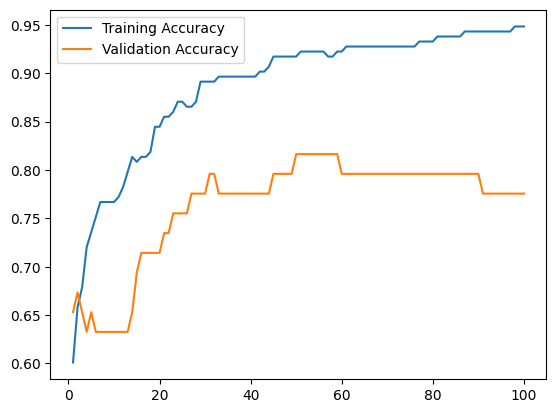

In [18]:
sns.lineplot(
    data=history.history,
    x=range(1, len(history.history['accuracy']) + 1),
    y=history.history['accuracy'],
    label='Training Accuracy'
)

sns.lineplot(
    data=history.history,
    x=range(1, len(history.history['accuracy']) + 1),
    y=history.history['val_accuracy'],
    label='Validation Accuracy'
)

In [22]:
# Clearly and early stopping would help with an pateince of 5 epochs, lets try and see how it behaves

early_stopping_callback = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, start_from_epoch=50, restore_best_weights=True)

model_with_es = keras.Model(inputs=input_layer, outputs=output_layer)

model_with_es.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_with_es = model_with_es.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping_callback])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9515 - loss: 0.1399 - val_accuracy: 0.7959 - val_loss: 0.5709
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9565 - loss: 0.1342 - val_accuracy: 0.7755 - val_loss: 0.5703
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9565 - loss: 0.1346 - val_accuracy: 0.7755 - val_loss: 0.5708
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9565 - loss: 0.1345 - val_accuracy: 0.7755 - val_loss: 0.5732
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9565 - loss: 0.1333 - val_accuracy: 0.7755 - val_loss: 0.5754
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9565 - loss: 0.1319 - val_accuracy: 0.7755 - val_loss: 0.5770
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9565 - loss: 0.1305 - val_accuracy: 0.7755 - val_loss: 0.5784
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9565 - loss: 0.1291 - val_accuracy: 0.7755 - val_loss:

In [23]:
# The number of less data-points since the epochs are higly limited

model_with_es.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8277 - loss: 0.5858


[0.5784786939620972, 0.8196721076965332]

In [24]:
# Turns out its performing worst in terms of loss ... lets stick with our main model